In [1]:
## Necessary packages
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import warnings
warnings.filterwarnings("ignore")

# 1. TimeGAN model
from timegan import timegan
# 2. Data loading
from data_loading import real_data_loading, sine_data_generation, real_data_loading2
# 3. Metrics
from metrics.discriminative_metrics import discriminative_score_metrics
from metrics.predictive_metrics import predictive_score_metrics
from metrics.visualization_metrics import visualization

import tensorflow as tf

import os

In [2]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ['CUDA_VISIBLE_DEVICES'] = "1"
config = tf.compat.v1.ConfigProto() # Another Version: config = tf.ConfigProto()
config.gpu_options.allow_growth = True

In [3]:
## Data loading
data_name = 'energy'
seq_len = 24
percentage = 0.05 # 10% observed data

if data_name in ['stock', 'energy']:
    ori_data = real_data_loading2(data_name, seq_len, percentage)
else:
    print("Data Loading Wrong!!!!")
print(data_name + ' dataset is ready.')

energy dataset is ready.


In [4]:
print("The new observed data shape: ", np.array(ori_data).shape)

The new observed data shape:  (963, 24, 28)


In [5]:
## Newtork parameters
parameters = dict()

parameters['module'] = 'gru' 
parameters['hidden_dim'] = 112 # 4 times of the data dimension
parameters['num_layer'] = 3
parameters['iterations'] = 5000
parameters['batch_size'] = 128

In [6]:
# Run TimeGAN
generated_data = timegan(ori_data, parameters)   
print('Finish Synthetic Data Generation')





Instructions for updating:
This class is equivalent as tf.keras.layers.GRUCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons


2021-08-16 11:56:29.479358: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-08-16 11:56:29.513845: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: Tesla V100-PCIE-32GB major: 7 minor: 0 memoryClockRate(GHz): 1.38
pciBusID: 0000:5e:00.0
2021-08-16 11:56:29.514023: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.0
2021-08-16 11:56:29.515095: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10.0
2021-08-16 11:56:29.516117: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10.0
2021-08-16 11:56:29.516366: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10.0
2021-08-16 11:56:29.517650: I tensorflow/stream_executor/platfo

Start Embedding Network Training


2021-08-16 11:56:32.444538: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10.0


step: 0/5000, e_loss: 0.2918
step: 1000/5000, e_loss: 0.0307
step: 2000/5000, e_loss: 0.0184
step: 3000/5000, e_loss: 0.0152
step: 4000/5000, e_loss: 0.0133
Finish Embedding Network Training
Start Training with Supervised Loss Only
step: 0/5000, s_loss: 0.341
step: 1000/5000, s_loss: 0.0513
step: 2000/5000, s_loss: 0.0336
step: 3000/5000, s_loss: 0.0292
step: 4000/5000, s_loss: 0.0257
Finish Training with Supervised Loss Only
Start Joint Training
step: 0/5000, d_loss: 2.1852, g_loss_u: 0.6106, g_loss_s: 0.0928, g_loss_v: 0.4049, e_loss_t0: 0.1138
step: 1000/5000, d_loss: 0.9721, g_loss_u: 2.1416, g_loss_s: 0.0409, g_loss_v: 0.0493, e_loss_t0: 0.0097
step: 2000/5000, d_loss: 1.0717, g_loss_u: 2.1085, g_loss_s: 0.0431, g_loss_v: 0.0375, e_loss_t0: 0.0081
step: 3000/5000, d_loss: 0.8978, g_loss_u: 1.7348, g_loss_s: 0.0381, g_loss_v: 0.032, e_loss_t0: 0.007
step: 4000/5000, d_loss: 0.901, g_loss_u: 1.8794, g_loss_s: 0.0366, g_loss_v: 0.0392, e_loss_t0: 0.0066
Finish Joint Training
Finish S

In [7]:
filename = data_name + "_data_TimeGAN_5000_sce2-2-0-005.npy"
np.save(filename, generated_data)

In [8]:
generated_data.shape

(391941, 24, 28)

In [9]:
generated_data[0][0]

array([0.02410999, 0.00313517, 0.54496137, 0.61347729, 0.19228136,
       0.81955039, 0.43323373, 0.75694167, 0.36075897, 0.65841203,
       0.6085655 , 0.30113271, 0.25880048, 0.95685029, 0.48997141,
       0.56434857, 0.76866338, 0.71178639, 0.93988306, 0.88873743,
       0.29477572, 0.31397158, 0.9221189 , 0.44487076, 0.92808175,
       0.52103066, 0.87866354, 0.87755012])

In [10]:
metric_iteration = 5

predictive_score = list()
for tt in range(metric_iteration):
  temp_pred = predictive_score_metrics(ori_data, generated_data)
  predictive_score.append(temp_pred)   
    
print('Predictive score: ' + str(np.round(np.mean(predictive_score), 4)))

Instructions for updating:
Please use tf.global_variables instead.



2021-08-16 13:29:25.463802: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: Tesla V100-PCIE-32GB major: 7 minor: 0 memoryClockRate(GHz): 1.38
pciBusID: 0000:5e:00.0
2021-08-16 13:29:25.463887: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.0
2021-08-16 13:29:25.463900: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10.0
2021-08-16 13:29:25.463912: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10.0
2021-08-16 13:29:25.463923: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10.0
2021-08-16 13:29:25.463932: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10.0
2021-08-16 13:29:25.463943: I tensorflow/stream_executor

Predictive score: 0.3401


In [11]:
print("all the predictive scores: ", predictive_score)
print('Predictive score avg. value: ' + str(np.round(np.mean(predictive_score), 4)))
print('Predictive score std. value: ' + str(np.round(np.std(predictive_score), 4)))

all the predictive scores:  [0.33929498601271535, 0.34450339486070325, 0.3419302264185962, 0.3331480575960398, 0.3417732923467901]
Predictive score avg. value: 0.3401
Predictive score std. value: 0.0039


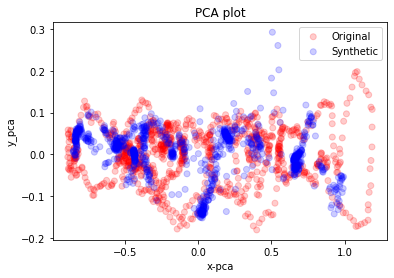

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1926 samples in 0.001s...
[t-SNE] Computed neighbors for 1926 samples in 0.108s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1926
[t-SNE] Computed conditional probabilities for sample 1926 / 1926
[t-SNE] Mean sigma: 0.055493
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.491726
[t-SNE] KL divergence after 300 iterations: 0.934574


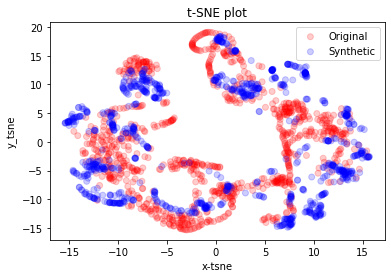

In [12]:
visualization(ori_data, generated_data, 'pca')
visualization(ori_data, generated_data, 'tsne')